# Notebook 2:  Clustering con GMM y Algoritmos Jerárquicos

En este notebook vamos a implementar el algoritmo de clustering de Mezcla de Normales en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

In [1]:
library(mclust)
library(cluster)
#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
summary(datos)

Package 'mclust' version 5.4.6
Type 'citation("mclust")' for citing this R package in publications.



     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEV (ellipsoidal, equal shape) model with 4 components: 

 log-likelihood  n df       BIC       ICL
      -129.0138 25 71 -486.5678 -486.5782

Clustering table:
1 2 3 4 
5 8 7 5 

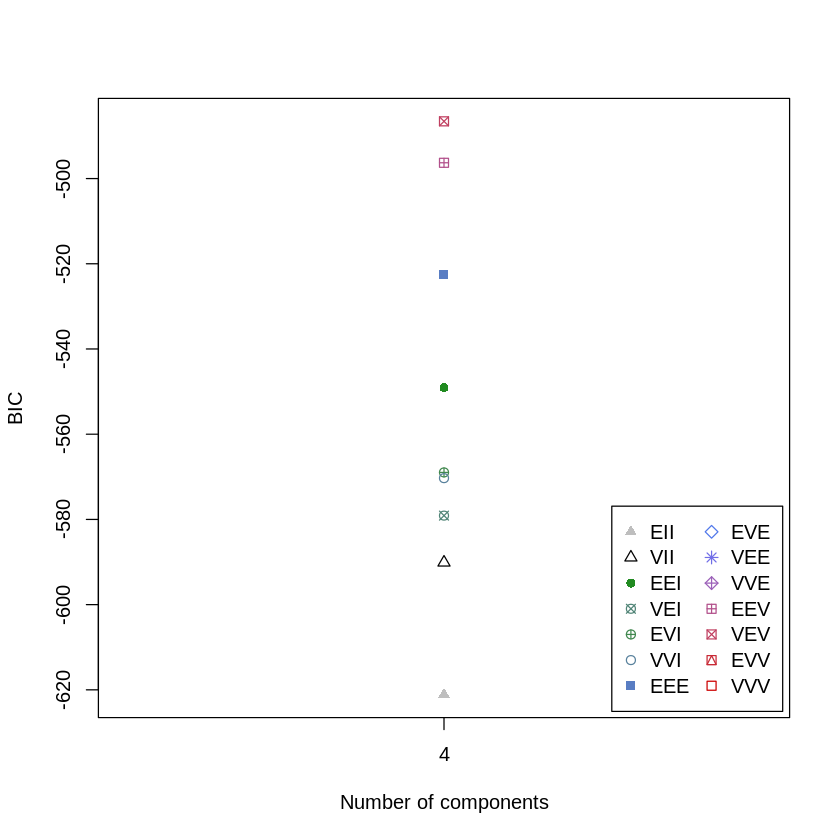

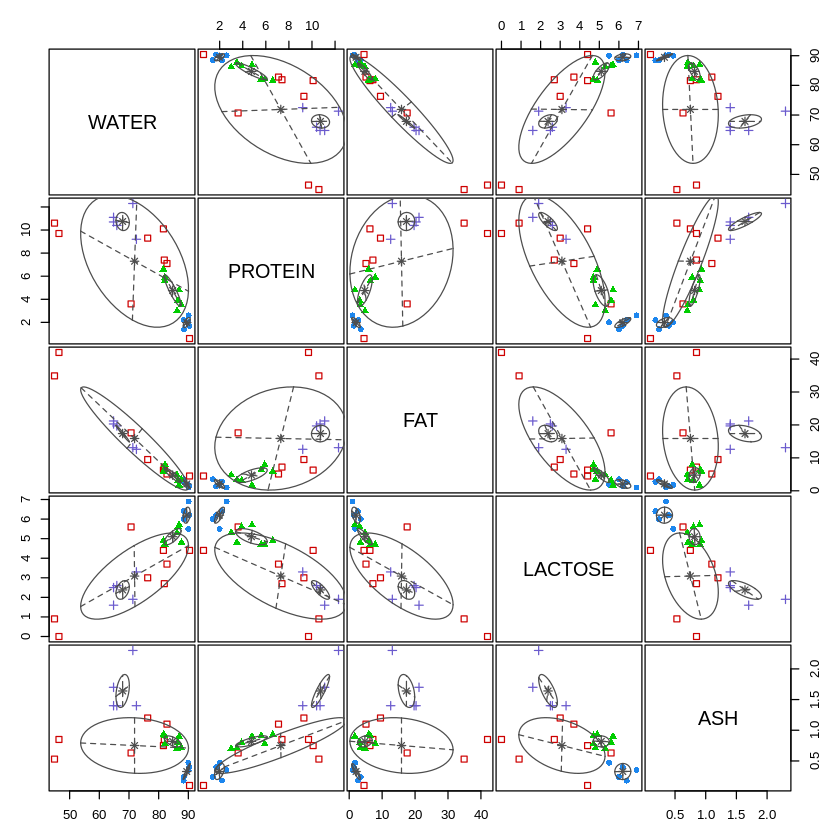

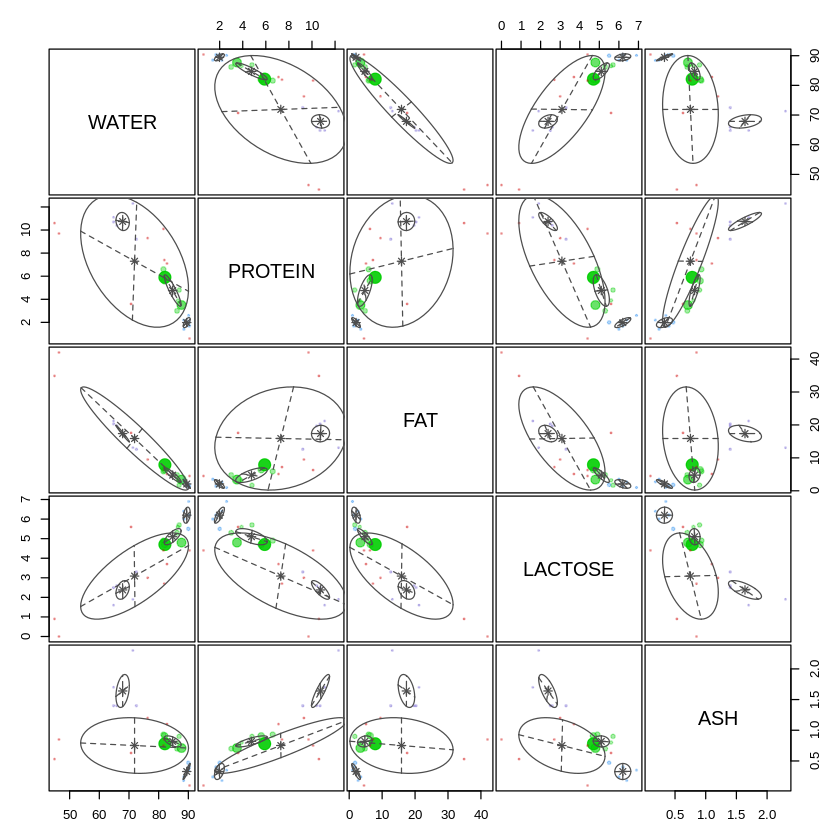

'Mclust' model object: (VEV,4) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

WATER,PROTEIN,FAT,LACTOSE,ASH
89.45999,1.980001,2.080005,6.200009,0.3279979
71.88271,7.298580,15.881214,3.088610,0.7512686
84.71493,4.756873,4.756149,5.100211,0.8185953
67.86000,10.740002,17.380003,2.379999,1.6400005


HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          2          3          3 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         3          2          2          3          3          1          2 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         3          3          2          2          4          4          4 
  REINDEER      WHALE       SEAL    DOLPHIN 
         4          4          2          2

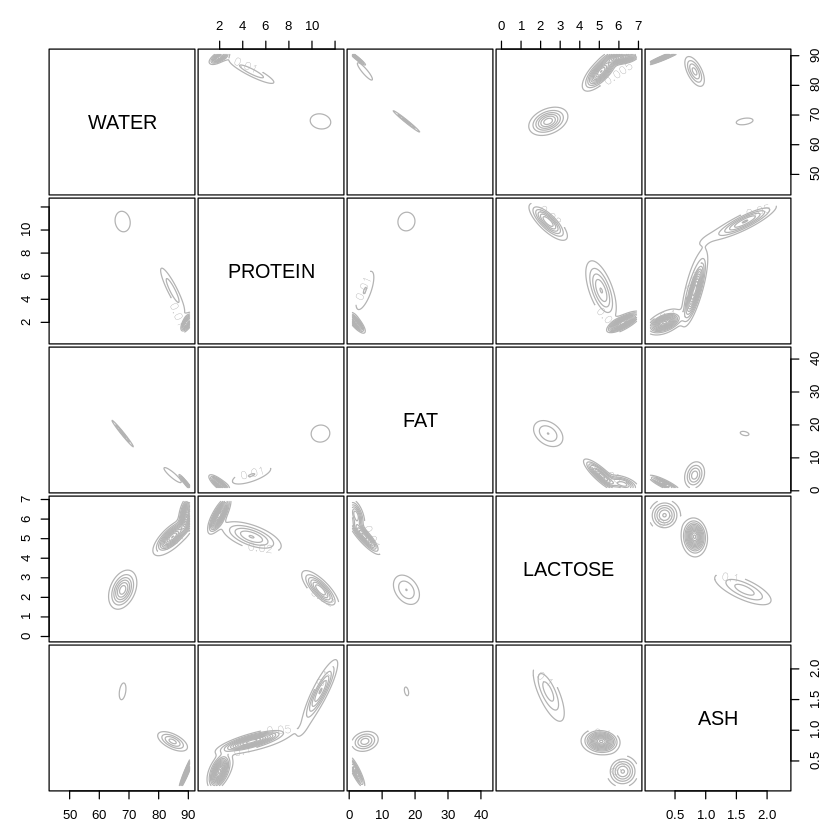

In [2]:
clus <-Mclust(datos,4)
summary(clus)
plot(clus)
clus

cl <- clus$classification
centers <- t(clus$parameters$mean)
centers
cl



Ejercicio 1: 
a) Explique como funciona el método Mclust, describa parámetros de entrada y salida.
b) Interprete y comente los resultados obtenidos. 

#### a) El método mclust está basado en modelos de mezclas gaussianas finitas parametrizadas,  emplea como EM (Expectativa-Maximización) el criterio maximum likelihood para ajustar los determinados modelos con un número variado de clusters y selecciona el mejor en base al criterio Bayesian Information Criterion (BIC) .
##### Parámetros: Mclust (data, G, modelNames, prior, control, initialization, warn, x, verbose)
###### Entrada:
###### data: Vector, matriz o data frame numérico de observaciones.
###### G: Un vector entero que especifica el numero de clusters.
###### modelNames: Un vector compuesto de cadena de caracteres que indica los modelos que se ajustarán en la fase EM de agrupamiento.
###### prior: Permite  la especificación de una conjugación previa sobre los medios y las variaciones a través de la función.
###### control: Una lista de parámetros de control para la fase EM.
###### initialization: Una lista que puede contener alguno de los componentes hcPairs, subset o noise.
##### warn: Un valor lógico que indica si se deben emitir ciertas advertencias (generalmente relacionadas con la singularidad).
##### Verbose: Un control lógico si se muestra una barra de progreso de texto durante el procedimiento de ajuste

##### Salida:
##### call: La llamada coincidente.
###### data: La matrix de datos de entrada.
##### modelName: Una cadena de caracteres que denota el modelo en el que se produce el BIC óptimo
###### n: El número de observaciones en los datos. 
###### d: La dimensión de los datos.
###### G: El número óptimo de clusters.
###### BIC: Todos los valores del criterio de información Bayesiana.
##### loglik: La probabilidad de registro correspondiente al BIC óptimo.
##### df: El número de parámetros estimado.
##### bic: el valor BIC del modelo seleccionado.
##### ICL: valor ICL del modelo seleccionado.
###### hypvol: EL parámetro hypervolume para el componente ruido.
###### parameters: Una lista de los siguientes parametros: pro, mean y  variance.
##### z: Una matriz cuya [i, k] valor de  entrada es la probabilidad de que la observación en los datos de prueba pertenezca a la clase k.
##### classification: La clasificación correspondiente a toz, por ejemplo, map(z).
##### uncertainty: La incertidumbre asociada a la clasificación.

#### b) Los resultados obtenidos nos indican el modelo  en el que se produce el mayor valor valor del BIC, para este caso es VEV. Además obtenemos la gráfica de los distintos grupos para los pares de componentes de la muestra (datos). Además obtenemos los valores medio para cada parámetro según su grupo y finalmente, su respectiva clasificación.


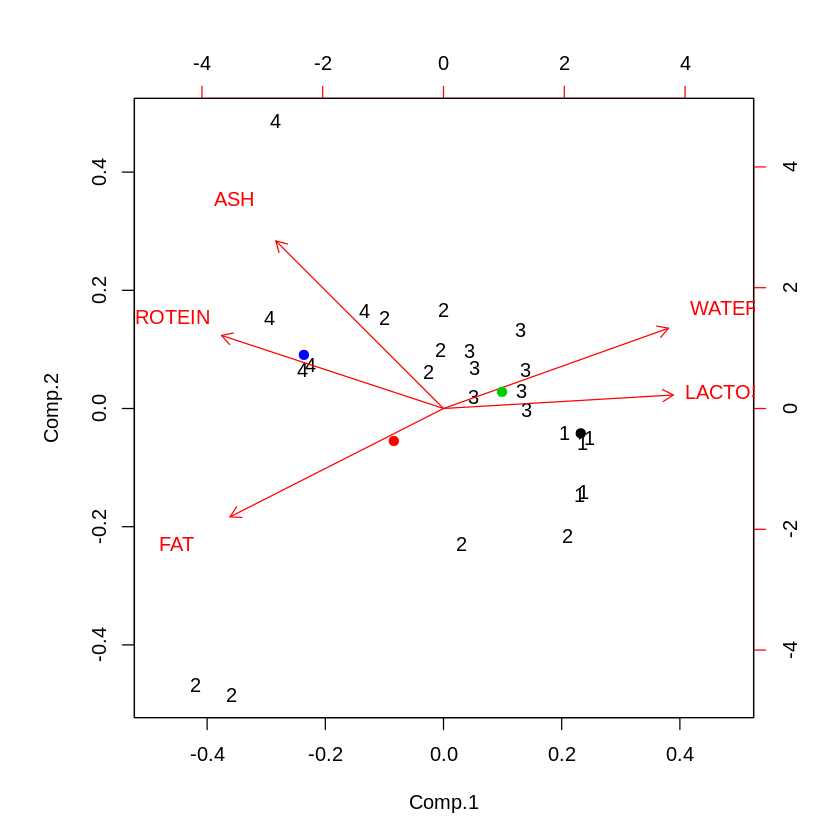

In [3]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,centers)

biplot(res,xlabs=cl)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:9,pch=19)


**Criterio de Información Bayesiano**

Una forma de discriminar entre posibles agrupamientos, es calcular el Criterio de Información Bayesiano, cuya expresión genérica es:
$$BIC = log(Datos\mid \hat{\theta}) - \frac{d}{2}log(N)$$
donde $d$ es el número de parámetros libres y $N$ el número de observaciones. A medida que aumenta el número de parámetros la verosimilitud aumenta, pero esto es moderado por el término en que depende de $d$.

Mclust calcula automática el BIC para distintas configuraciones de las matrices covarianza de cada Normal multivariada (que corresponden a distintos números de parámetros) así como distinto número de grupos. Por parsimonia, es recomendable escoger el primer número de grupos que representa un máximo local.

Ejercicio 2: 

a) Utilice Mclust sin definir el número de grupos y considere el Criterio de información Bayesiano (BIC) para decidir el número de grupos óptimo. 

#### El número óptimo local de grupos es 3, ya que se obtiene el mayor BIC local.

b) Discuta y compare  sus resultados con aquellos obtenidos con k-means

#### El número de grupos utilizando Mclust es 3, al igual que con k-means, de aqui concluimos que ambos modelos coinciden en el número de óptimo de grupos.

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 9 components: 

 log-likelihood  n  df       BIC       ICL
       69.49069 25 148 -337.4122 -337.4122

Clustering table:
1 2 3 4 5 6 7 8 9 
3 3 6 3 2 1 1 4 2 

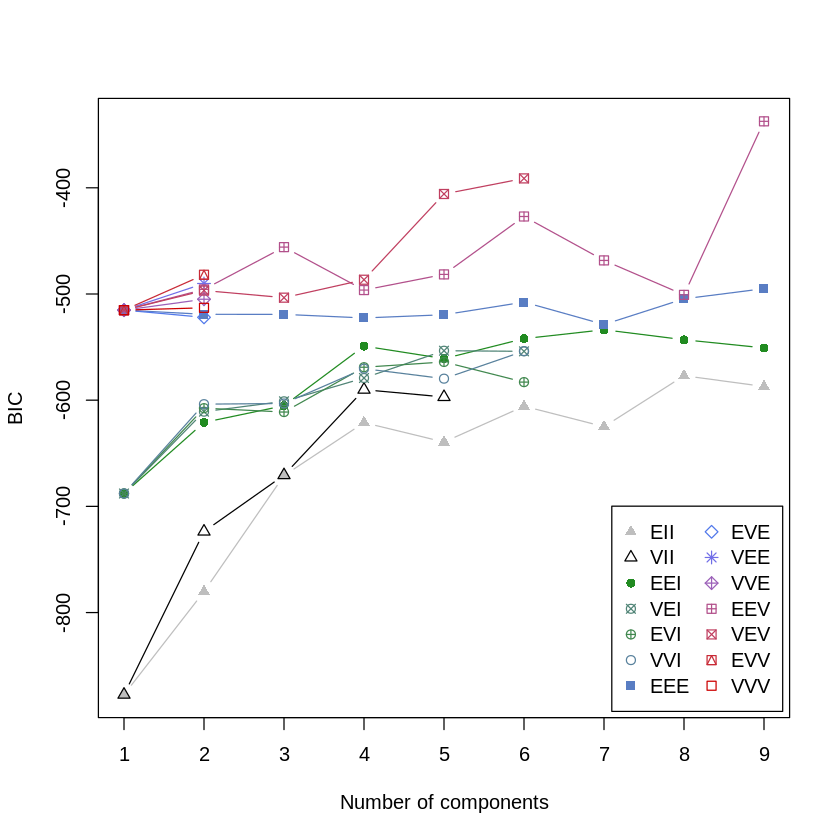

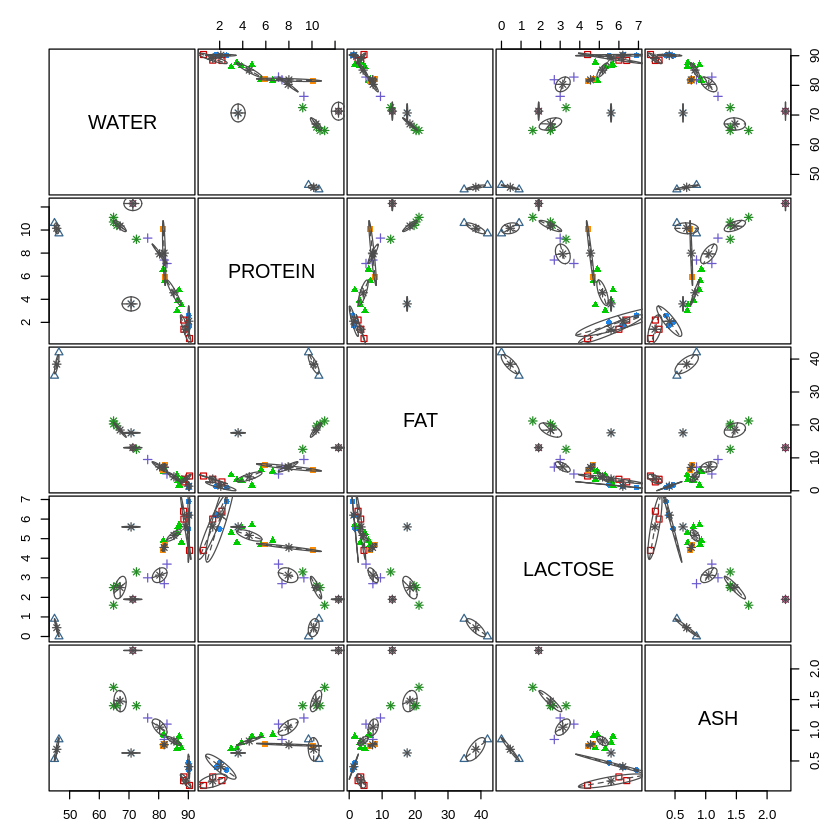

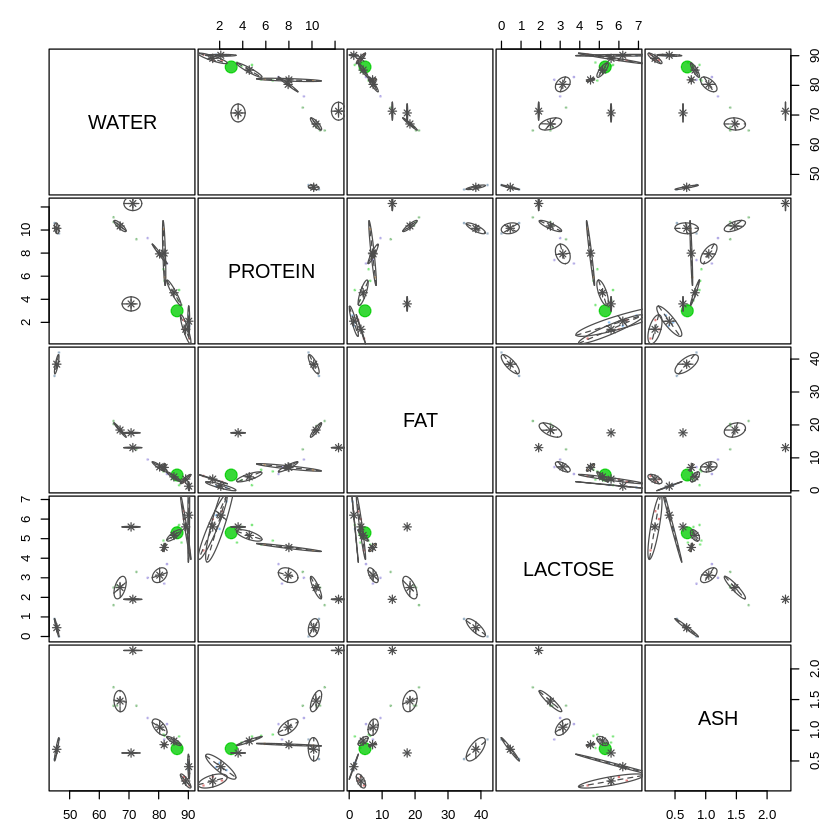

'Mclust' model object: (EEV,9) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

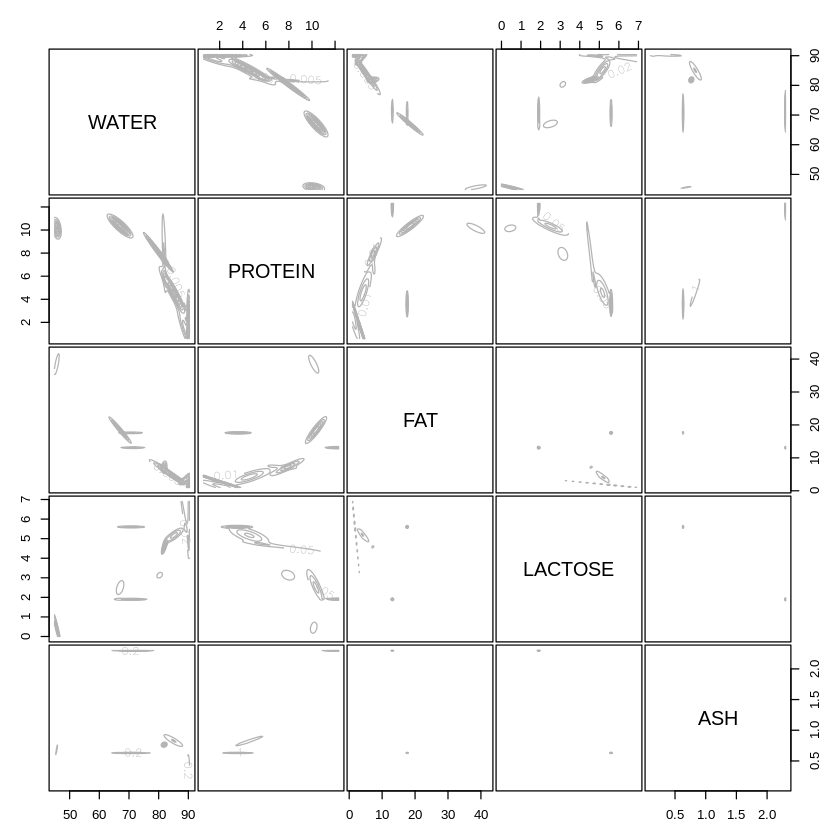

In [4]:
clus <-Mclust(datos)
summary(clus)
plot(clus)
clus

En lo que sigue, utilizaremos el método hclust, que permite realizar análisis de agrupamiento jerárquico

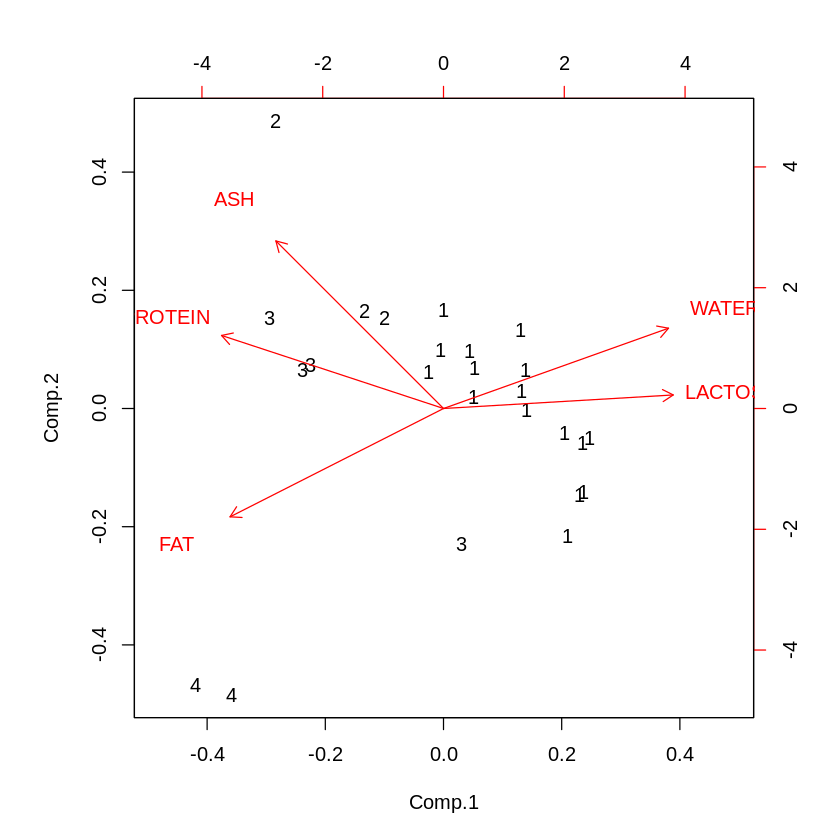

In [18]:
res3 <- hclust(dist(datos/2))
biplot(res, xlabs= cutree(res3,4))

Ejercicio 3: 
### a) Explique como funciona el método hclust, describa parámetros de entrada y salida.
#### Esta función realiza un análisis de agrupamiento jerárquico utilizando un conjunto de diferencias para los n objetos que se agrupan. Inicialmente, cada objeto se asigna a su propio grupo y luego el algoritmo procede de forma iterativa, en cada etapa uniendo los dos grupos más similares, continuando hasta que haya un solo grupo. En cada etapa, las distancias entre grupos se vuelven a calcular mediante la fórmula de actualización de disparidad de Lance-Williams de acuerdo con el método de agrupación particular que se utiliza.



#### Parámetros:
#### Entrada: 
##### d: Estructura de distancia euclidiana.
##### method: La aglomeración del método a usar, puede ser single, complete, average, entre otros.
##### members: Null o un vector con tamaño de longitud d.
##### x: Objeto del tipo producido por hclust.
##### hang: La fracción de la altura del gráfico por la cual las etiquetas deben colgar debajo del resto del gráfico. Un valor negativo hará que las etiquetas cuelguen de 0.
##### check: lógica que indica si se debe verificar la validez del objeto x. Esta comprobación no es necesaria cuando se sabe que x es válido, como cuando es el resultado directo de hclust (). El valor predeterminado es check = TRUE, ya que las entradas no válidas pueden bloquearse R debido a una violación de la memoria en el código de trazado interno C.
##### labels: Un vector de caracteres de etiquetas para las hojas del árbol. Por defecto, se utilizan los nombres de fila o números de fila de los datos originales. Si etiquetas = FALSO no se trazan etiquetas en absoluto.
##### axes, frame.plot, ann: flags lógicas.
##### main, sub, xlab, ylab: Cadena de caracteres para títulos.

#### Salida:
###### merge: una matriz n − 1 por 2. La fila i de fusión describe la fusión de clústeres en el paso i de la agrupación. Si un elemento j en la fila es negativo, entonces la observación −j se fusionó en esta etapa. Si j es positivo, entonces la fusión se realizó con el grupo formado en la etapa (anterior) j del algoritmo. Por lo tanto, las entradas negativas en combinación indican aglomeraciones de singletons, y las entradas positivas indican aglomeraciones de no singletons.
###### height: un conjunto de n − 1 valores reales (no decrecientes para árboles ultramétricos). La altura de agrupamiento: es decir, el valor del criterio asociado con el método de agrupamiento para la aglomeración particular.
###### order: un vector que proporciona la permutación de las observaciones originales adecuadas para el trazado, en el sentido de que un diagrama de clúster que utiliza este orden y la fusión de la matriz no tendrá cruces de las ramas.
###### labels: etiquetas para cada uno de los objetos que se agrupan.
###### call: Llamada que produce el resultado
###### method: El método cluster que ha sido usado
###### dist.method: La distancia que ha sido usada para crear "d".

### b) Interprete y comente los resultados obtenidos. 
##### Los grupos fueron agrupados, siendo el grupo 1 el mayor contenedor de lacto y water, ambas en bajas cantidades. Grupo dos contiene protein y ash, mientras que el grupo 3 contiene los mayores índices de proteína, siendo este su casi único componente.


### c) Utilice otros parámetros en hclust y discuta como varían los resultados.

#### utilizando el método ward.D, en el gráfico de más abajo, se puede apreciar que se encuentran más muestras disponibles para los grupos 1,2 y 3, sin embargo, estos mantienen su estructura de composición


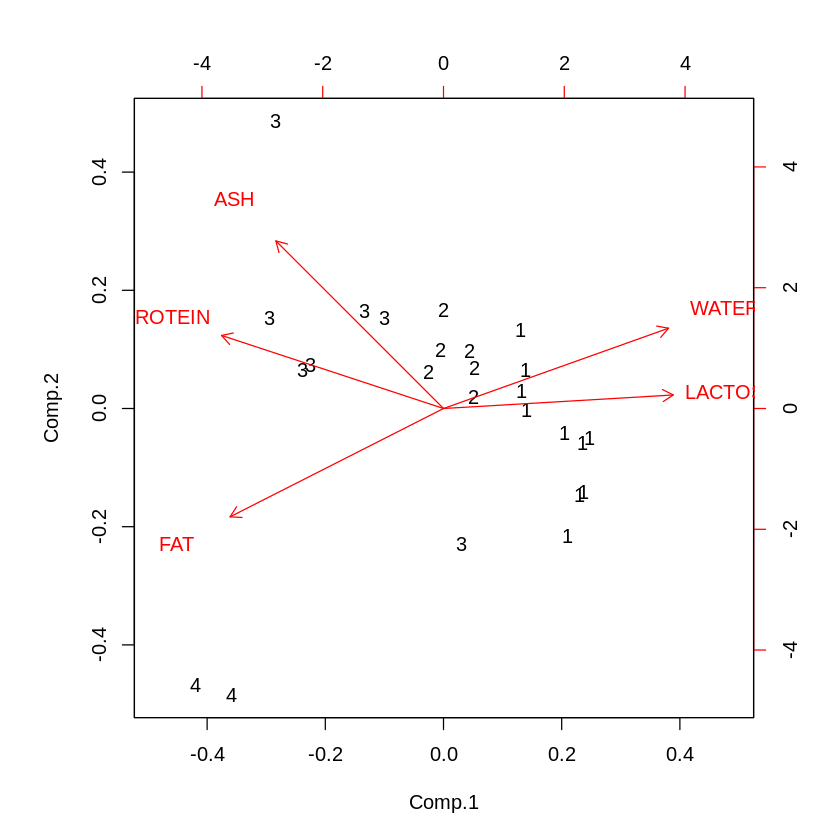

In [19]:
ress <- hclust(dist(datos), method = "ward.D")
biplot(res, xlabs= cutree(ress,4))

Ejercicio 4: 

a) Realice un análisis de clustering con Kmeans, GMM y Análisis Jerárquico para el conjunto de datos iris.csv. Interprete sus resultados.

b) Estudie las medidas de calidad propuestas en Murphy, Capítulo 25: purity, rand index y mutual information (pdf en siveducMD). Calcule alguna de las medidas de calidad estudiadas, para cada uno de los análisis realizado en (a). Discuta sus resultados.

In [6]:
#Análisis con GMM
library(mclust)
library(cluster)
library(readr)
#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos2 <-read.table("iris.csv",sep=";",header=TRUE)
summary(datos2)

  sepal.length  sepal.width  petal.length  petal.width       variety  
 5,0    :10    3,0    :26   1,4    :13    0,2    :29   Setosa    :50  
 5,1    : 9    2,8    :14   1,5    :13    1,3    :13   Versicolor:50  
 6,3    : 9    3,2    :13   4,5    : 8    1,5    :12   Virginica :50  
 5,7    : 8    3,4    :12   5,1    : 8    1,8    :12                  
 6,7    : 8    3,1    :11   1,3    : 7    1,4    : 8                  
 5,5    : 7    2,9    :10   1,6    : 7    2,3    : 8                  
 (Other):99    (Other):64   (Other):94    (Other):68                  

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEV (ellipsoidal, equal shape) model with 2 components: 

 log-likelihood   n df       BIC       ICL
      -1509.796 150 37 -3204.985 -3205.255

Clustering table:
  1   2 
 50 100 

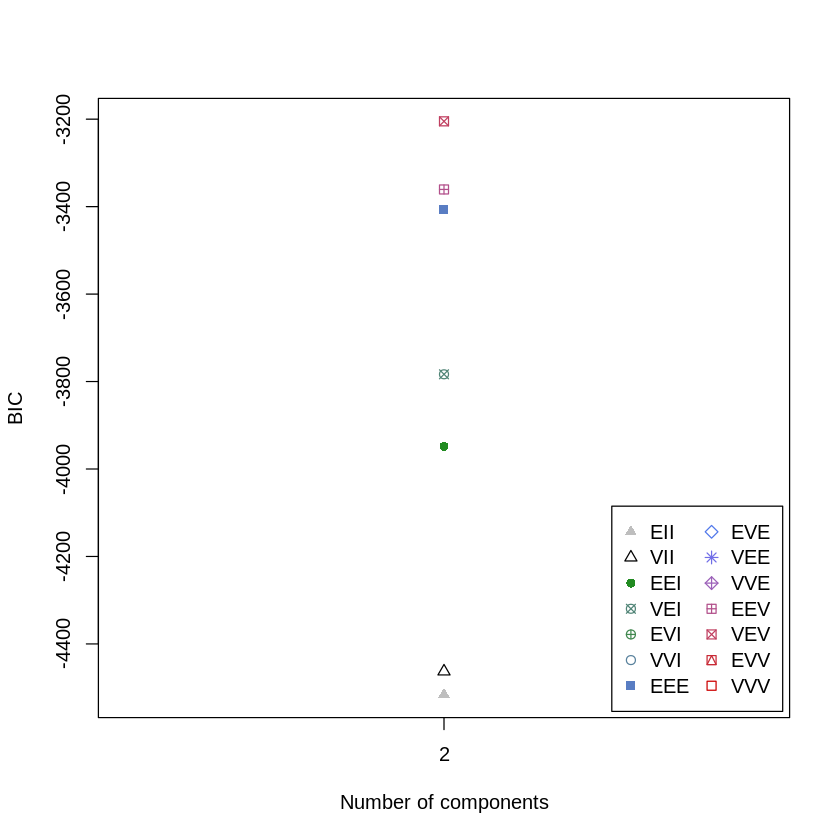

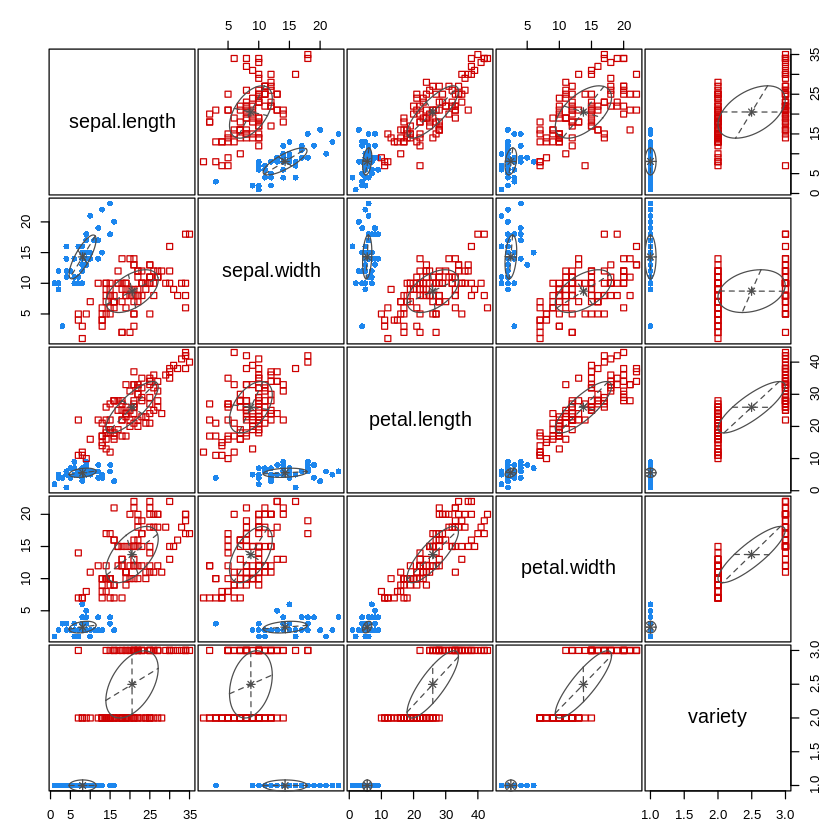

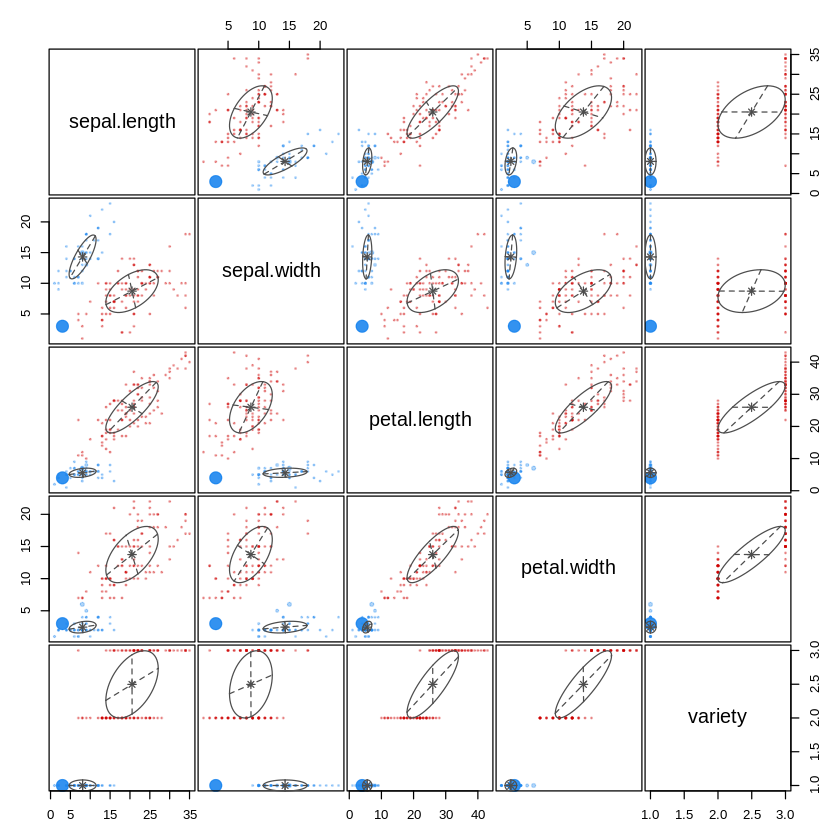

'Mclust' model object: (VEV,2) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

sepal.length,sepal.width,petal.length,petal.width,variety
8.074702,14.292756,5.584353,2.457951,1.000000
20.523548,8.722169,25.966550,13.743708,2.497702


[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2

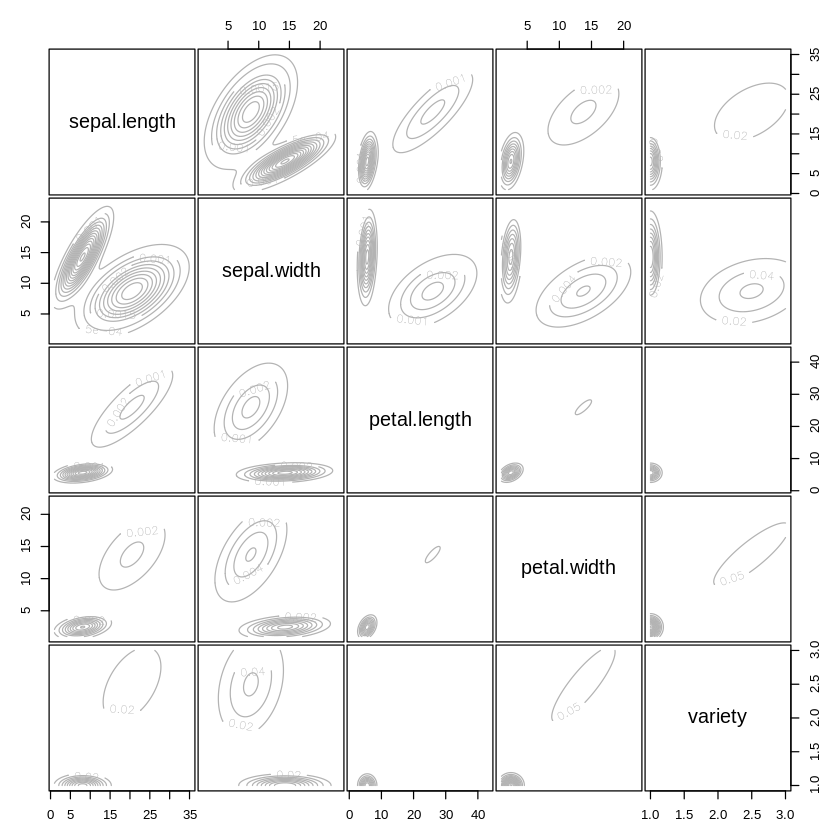

In [7]:
clus <-Mclust(datos2,2)
summary(clus)
plot(clus)
clus

cl <- clus$classification
centers <- t(clus$parameters$mean)
centers
cl

In [8]:
library(cluster)
res4 <- hclust(dist(datos2))
biplot(res, xlabs= cutree(res4,4))

Warning message in dist(datos2):
“NAs introducidos por coerción”


ERROR: Error in hclust(dist(datos2)): NA/NaN/Inf en llamada a una función externa (arg 11)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




    sepal.length sepal.width petal.length petal.width    variety
1            5,1         3,5          1,4         0,2     Setosa
2            4,9         3,0          1,4         0,2     Setosa
3            4,7         3,2          1,3         0,2     Setosa
4            4,6         3,1          1,5         0,2     Setosa
5            5,0         3,6          1,4         0,2     Setosa
6            5,4         3,9          1,7         0,4     Setosa
7            4,6         3,4          1,4         0,3     Setosa
8            5,0         3,4          1,5         0,2     Setosa
9            4,4         2,9          1,4         0,2     Setosa
10           4,9         3,1          1,5         0,1     Setosa
11           5,4         3,7          1,5         0,2     Setosa
12           4,8         3,4          1,6         0,2     Setosa
13           4,8         3,0          1,4         0,1     Setosa
14           4,3         3,0          1,1         0,1     Setosa
15           5,8         

  sepal.length    sepal.width     petal.length    petal.width    
 Min.   : 1.00   Min.   : 1.00   Min.   : 1.00   Min.   : 1.000  
 1st Qu.: 9.00   1st Qu.: 8.00   1st Qu.: 7.00   1st Qu.: 3.000  
 Median :16.00   Median :10.00   Median :20.50   Median :10.000  
 Mean   :16.39   Mean   :10.57   Mean   :19.19   Mean   : 9.993  
 3rd Qu.:22.00   3rd Qu.:13.00   3rd Qu.:28.00   3rd Qu.:15.000  
 Max.   :35.00   Max.   :23.00   Max.   :43.00   Max.   :22.000  
       variety  
 Setosa    :50  
 Versicolor:50  
 Virginica :50  
                
                
                

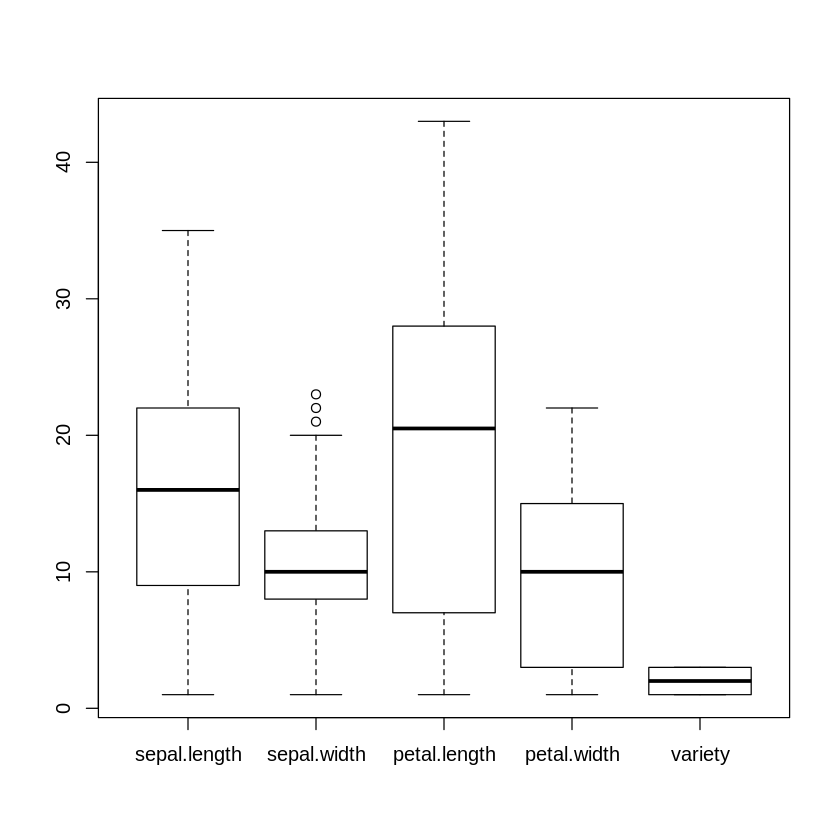

In [9]:
#Utilizando k means
library(cluster)
library(ggplot2)
library(readr)
library(dplyr)
#ruta datos

datos2 <-read.table("iris.csv", sep=";",header = TRUE)
print(datos2)
datos2$sepal.length <-as.numeric(datos2$sepal.length)
datos2$sepal.width <- as.numeric(datos2$sepal.width)
datos2$petal.width <- as.numeric(datos2$petal.width)
datos2$petal.length <- as.numeric(datos2$petal.length)
datos2$variety <- as.factor(datos2$variety)
summary(datos2)
boxplot(datos2)

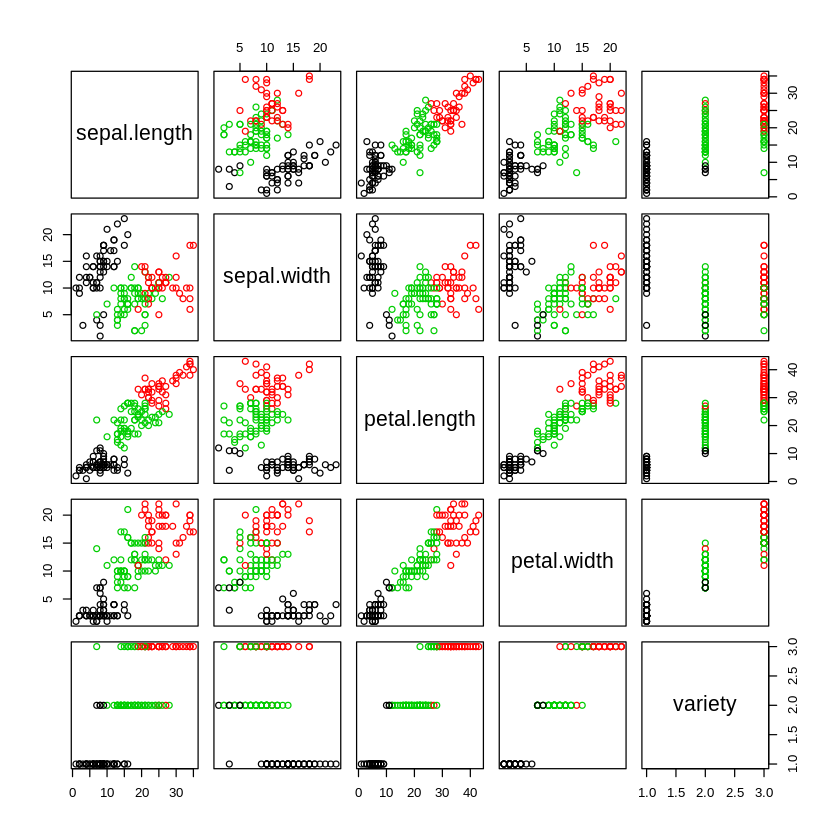

In [10]:
#ingresar valor de k0 
k0=3
cl<-kmeans(datos2[,-5],k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos2,col=cl$cluster)

